Found 43954 images belonging to 10 classes.
Found 14651 images belonging to 10 classes.
Found 14652 images belonging to 10 classes.
Epoch 1/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 360s 523ms/step - accuracy: 0.1853 - loss: 2.2499 - val_accuracy: 0.4297 - val_loss: 1.7243
Epoch 2/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 357s 520ms/step - accuracy: 0.5319 - loss: 1.4326 - val_accuracy: 0.6836 - val_loss: 1.0255
Epoch 3/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 366s 533ms/step - accuracy: 0.7357 - loss: 0.8861 - val_accuracy: 0.7813 - val_loss: 0.7389
Epoch 4/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 365s 531ms/step - accuracy: 0.8030 - loss: 0.6605 - val_accuracy: 0.7909 - val_loss: 0.7063
Epoch 5/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 390s 568ms/step - accuracy: 0.8290 - loss: 0.5644 - val_accuracy: 0.8315 - val_loss: 0.5777
Epoch 6/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 366s 533ms/step - accuracy: 0.8530 - loss: 0.4781 - val_accuracy: 0.8400 - val_loss: 0.5482
Epoch 7/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 372s 542ms/step - accuracy: 0.8707 -

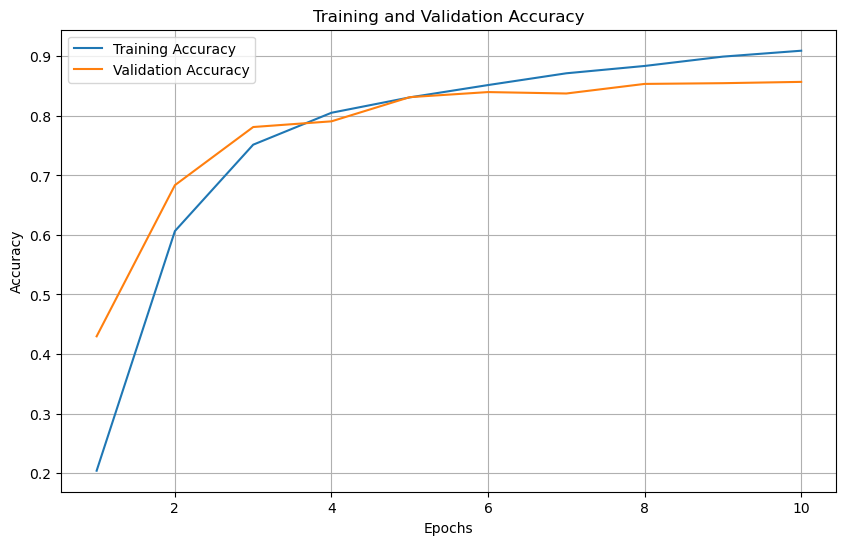

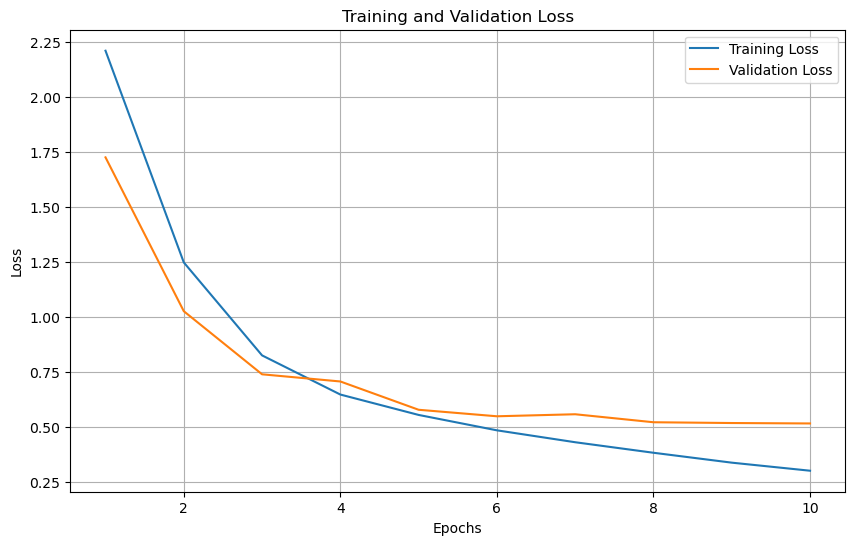

In [ ]:
import tensorflow as tf
from alexnet_model import AlexNet
import matplotlib.pyplot as plt

def train_alexnet():
    """
    Train AlexNet
    """
    # Data Generators (Normalization Only)
    train_data = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
    valid_test_data = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

    # Loading Training, Validation, and Test Data
    train_generator = train_data.flow_from_directory(
        '/Users/maximilianstumpf/Desktop/UCLA/Math156 - Machine Learning/Project/Data/Processed/train',
        batch_size = 64,
        class_mode = 'categorical',
        shuffle = True
    )
    validation_generator = valid_test_data.flow_from_directory(
        '/Users/maximilianstumpf/Desktop/UCLA/Math156 - Machine Learning/Project/Data/Processed/val',
        batch_size = 64,
        class_mode = 'categorical',
        shuffle = True
    )
    test_generator = valid_test_data.flow_from_directory(
        '/Users/maximilianstumpf/Desktop/UCLA/Math156 - Machine Learning/Project/Data/Processed/test',
        batch_size = 64,
        class_mode = 'categorical',
        shuffle = False
    )
    
    # Define AlexNet Model
    num_classes = 10
    model = AlexNet(num_classes=num_classes)
    
    # Learning Rate Scheduler
    lr_schedule = tf.keras.optimizers.schedules.CosineDecay(
        initial_learning_rate = 0.005,
        decay_steps = 10000,
        alpha = 0.0001
    )
    
    # Optimizer
    optimizer = tf.keras.optimizers.SGD(
        learning_rate = lr_schedule,
        momentum = 0.9,
        nesterov = True
    )
    
    # Compile the Model
    model.compile(
        optimizer = optimizer,
        loss = 'categorical_crossentropy',
        metrics = ['accuracy']
    )
    
    # Training the Model
    history = model.fit(
        train_generator,
        epochs = 10,
        validation_data = validation_generator,
        callbacks =[
            tf.keras.callbacks.ModelCheckpoint(
                'alexnet_checkpoint.keras',  # Save the best model checkpoint
                save_best_only = True,
                monitor = 'val_accuracy'
            ),
            tf.keras.callbacks.EarlyStopping(
                monitor = 'val_loss',
                patience = 3,               # Stop training if val_loss doesn't improve for 3 epochs
                restore_best_weights = True
            )
        ]
    )
    
    # Save Final Weights
    model.save_weights('alexnet_final.weights.h5')
    
    # Evaluate on Test Data
    test_loss, test_accuracy = model.evaluate(test_generator)
    print(f"Test Loss: {test_loss:.4f}")
    print(f"Test Accuracy: {test_accuracy:.4f}")
    
    return model, history

def plot_training_results(history):
    """
    # Plotting Function (Separated from Training)
    """
    # Extract metrics from history
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    # Plot Training and Validation Accuracy
    plt.figure(figsize=(10, 6))
    plt.plot(epochs, acc, label='Training Accuracy')
    plt.plot(epochs, val_acc, label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid()
    plt.show()

    # Plot Training and Validation Loss
    plt.figure(figsize=(10, 6))
    plt.plot(epochs, loss, label='Training Loss')
    plt.plot(epochs, val_loss, label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid()
    plt.show()

if __name__ == "__main__":
    # Train the model
    model, history = train_alexnet()
    
    # Plot the training results (AFTER training completes)
    plot_training_results(history)